In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def saturation_fit(x, m, b, tau):
    return (m*x + b) / (1 + tau*(m*x + b))

def lin_fit(x, m, b):
    return m*x + b

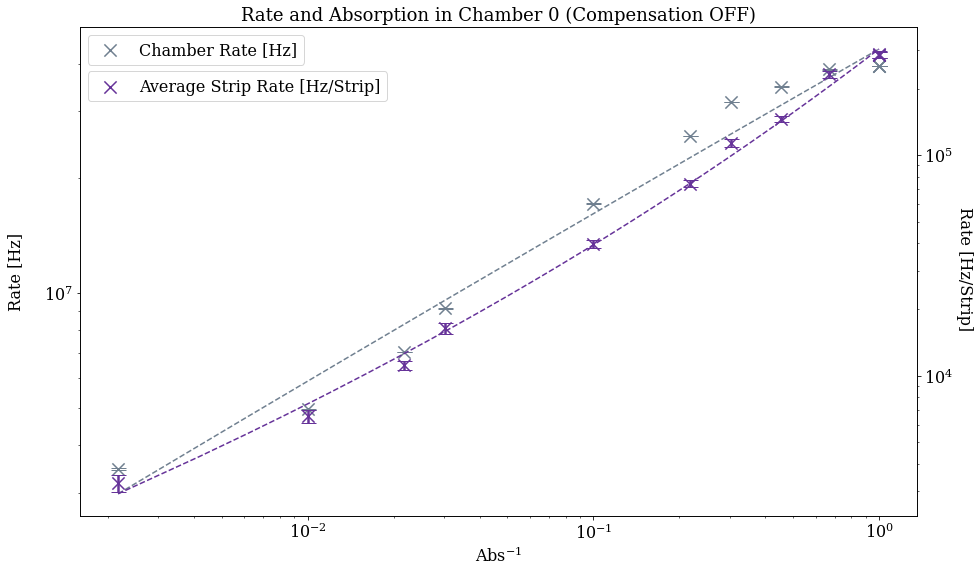

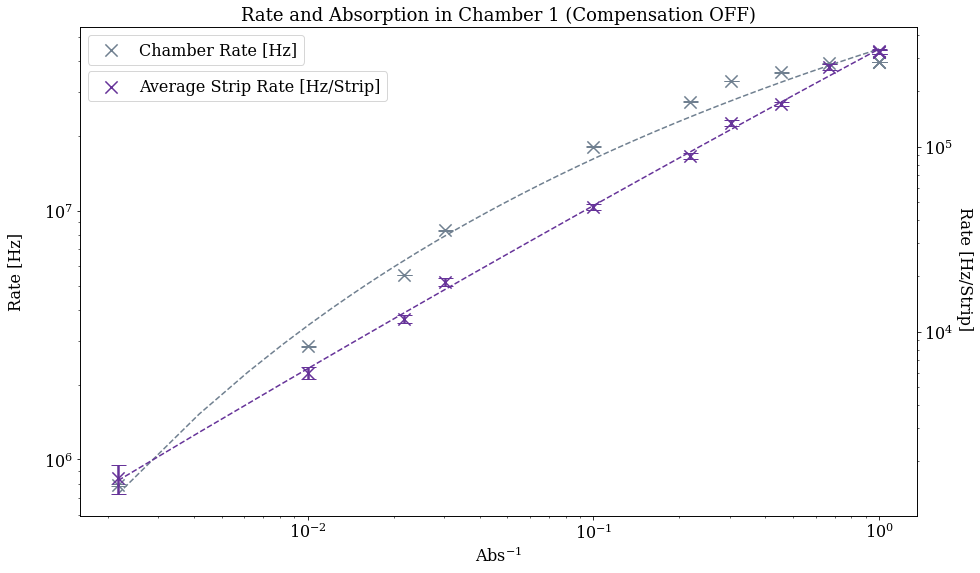

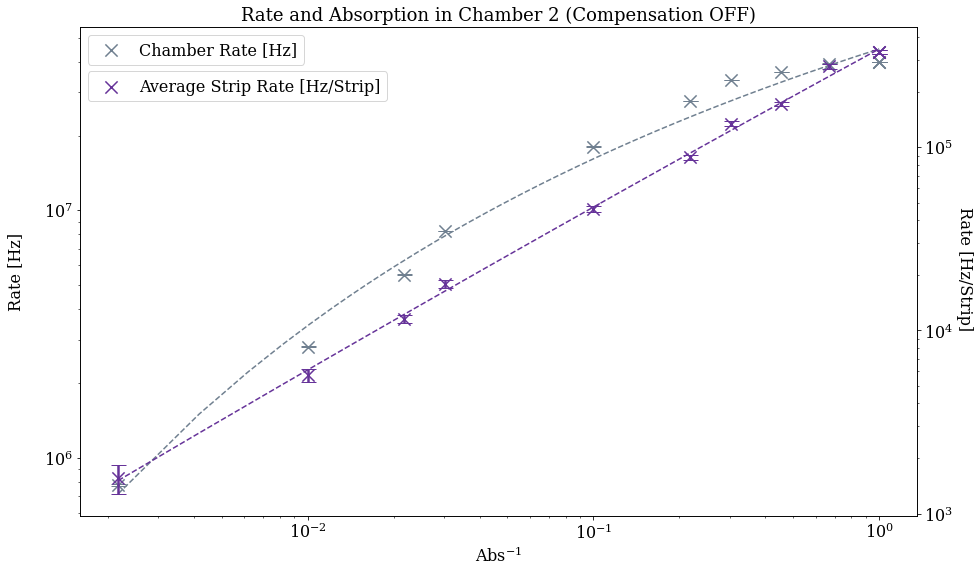

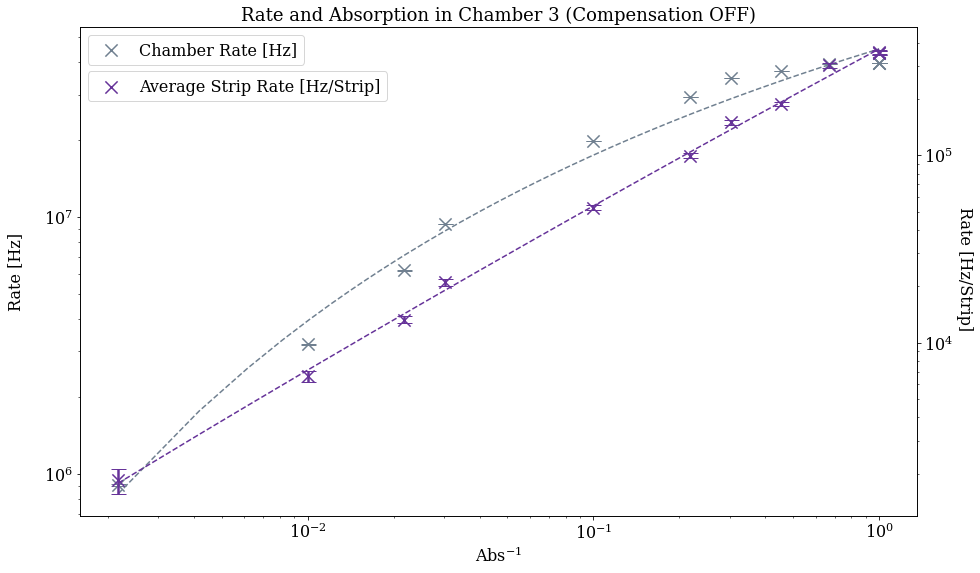

In [8]:
# Compensation OFF
#run_abs = {285:1, 289:1, 290:1, 292:1, 295:460, 296:1.5, 298:2.2, 300:3.3, 302:4.6, 304:10, 306:33, 308:46, 310:100}
run_abs = {285:1, 289:1, 290:1, 295:460, 296:1.5, 298:2.2, 300:3.3, 302:4.6, 304:10, 306:33, 308:46, 310:100}
#run_abs = {285:1, 289:1, 290:1, 296:1.5, 298:2.2, 300:3.3}

chambers = []
chamber_rate = []
eta_rate = []

data_chamber = {}
data_eta = {}
data_strip = {}

unique_chambers = [0, 1,2,3]

font_title = {'family':'serif','color':'black','size':18}
font_axes = {'family':'serif','color':'black','size':16}
font_ticks = {'family':'serif','color':'black','size':16}

##########################################################    

for run in run_abs.keys():
    
    temp = pd.read_csv("Rate_per_Chamber_Run-"+str(run)+".csv")
    data_chamber[run]=temp
    
    for ch in unique_chambers:
              
        #temp = pd.read_csv("Rate_per_Eta_Run-"+str(run)+".csv")
        #data_eta[run]= temp
        
        temp = pd.read_csv("Average_Rate_per_Strip_Run-"+str(run)+".csv")
        data_strip[run]= temp
        
##########################################################    

# organizing by chambers 
yolk = {}
for ch in unique_chambers:
    d_ch = {}
    d_ch_err = {}
    d_st = {}
    d_st_err = {}
    
    for run in run_abs.keys():
        
        temp1 = data_chamber[run]
        cut = temp1["Chamber"] == ch
        temp1 = temp1[cut]
        d_ch[temp1["Rate"][ch]] = run_abs[run]
        d_ch_err[temp1["Error"][ch]] = run_abs[run]
        
        temp2 = data_strip[run]
        cut = temp2["Chamber"] == ch
        temp2 = temp2[cut]
        d_st[np.average(temp2["Average Strip Rate"])] = run_abs[run]
        d_st_err[np.average(temp2["Uncertainty in the Mean"])] = run_abs[run]
        
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(15, 9)
    
    x1 = np.divide(1,list(d_ch.values()))
    y1 = list( d_ch.keys() )
    plt.scatter( x1, y1, marker = 'x', color = 'slategrey', s = 150, label = 'Chamber Rate [Hz]' )
    plt.errorbar( x1, y1, yerr=d_ch_err.keys(), linestyle='',elinewidth=2.5,capsize=7.5,ecolor='slategrey')
    
    x_fitting = np.log10(x1)
    y_fitting = np.log10(y1)
    guess = [(max(y_fitting)-min(y_fitting)) / (max(x_fitting)-min(x_fitting)), 0, 0]
    i = 0
    while i < 3:
        param, cov = curve_fit(saturation_fit, x_fitting, y_fitting, p0 = guess)
        guess = param
        i += 1
    x_sort = np.linspace(min(x1),max(x1),500)
    x_sort_10 = np.log10(x_sort)
    y_fitting = np.power(10, saturation_fit(x_sort_10,param[0],param[1],param[2]))
    plt.plot(x_sort, y_fitting, color = 'slategrey', linestyle = '--')
    #plt.plot(x_sort, np.power(10, lin_fit(x_sort_10, param[0], param[1])), color = 'slategrey', linestyle = '--')
    
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel('$\mathregular{Abs^{-1}}$', loc = 'center',fontdict = font_axes)
    plt.xticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    plt.ylabel('Rate [Hz]', loc = 'center', fontdict = font_axes, labelpad = 20)
    
    plt.legend(loc = 'upper left', bbox_to_anchor=(0, 1),  prop = {'family':'serif','size':16})
    
    ax1 = ax1.twinx()
    x2 = np.divide(1,list(d_st.values()))
    y2 = list( d_st.keys() )
    plt.scatter(x2, y2, marker = 'x', color = 'rebeccapurple',s = 150, label = 'Average Strip Rate [Hz/Strip]')
    plt.errorbar(x2, y2,yerr=d_st_err.keys(),linestyle='',elinewidth=2.5,capsize=7.5,ecolor='rebeccapurple')
    
    x_fitting = np.log10(x2)
    y_fitting = np.log10(y2)
    guess = [(max(y_fitting)-min(y_fitting)) / (max(x_fitting)-min(x_fitting)), 0, 0]
    i = 0
    while i < 3:
        param, cov = curve_fit(saturation_fit, x_fitting, y_fitting, p0 = guess)
        guess = param
        i += 1
    x_sort = np.linspace(min(x2),max(x2),500)
    x_sort_10 = np.log10(x_sort)
    y_fitting = np.power(10, saturation_fit(x_sort_10,param[0],param[1],param[2]))
    plt.plot(x_sort, y_fitting, color = 'rebeccapurple', linestyle = '--')
    #plt.plot(x_sort, np.power(10, lin_fit(x_sort_10, param[0], param[1])), color = 'rebeccapurple', linestyle = '--')
    
    plt.xscale("log")
    plt.yscale("log")
    ax1.set_title("Rate and Absorption in Chamber "+str(ch)+" (Compensation OFF)", fontdict = font_title)
    plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    plt.ylabel('Rate [Hz/Strip] ', fontdict = font_axes, rotation = 270, loc = 'center', labelpad = 20)
    
    plt.legend(loc = 'upper left', bbox_to_anchor=(0, 0.925), prop = {'family':'serif','size':16})

    #plt.savefig("Rate_vs_Attenuation_Chamber_"+str(ch)+"_COMP-OFF.png")
    
    plt.show()
    
    plt.close()

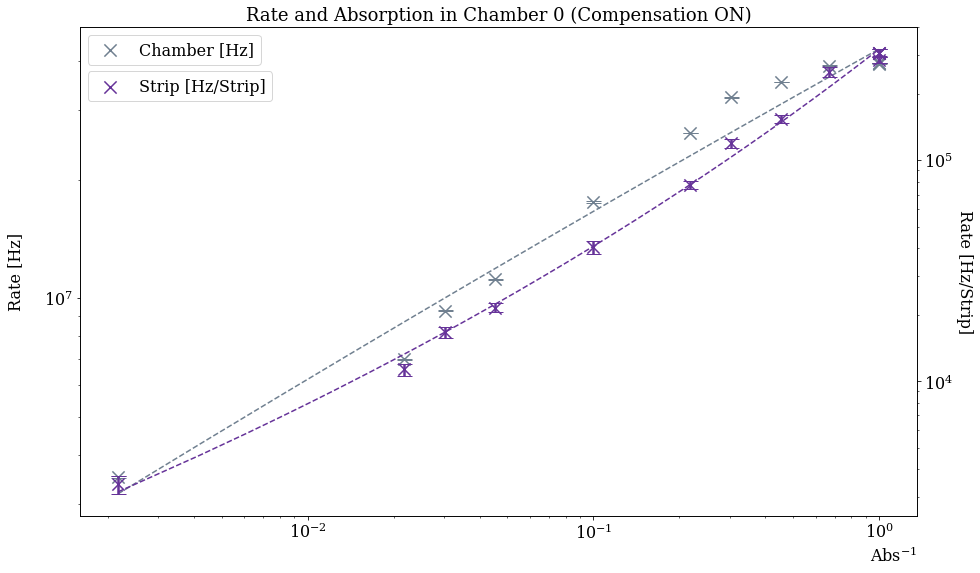

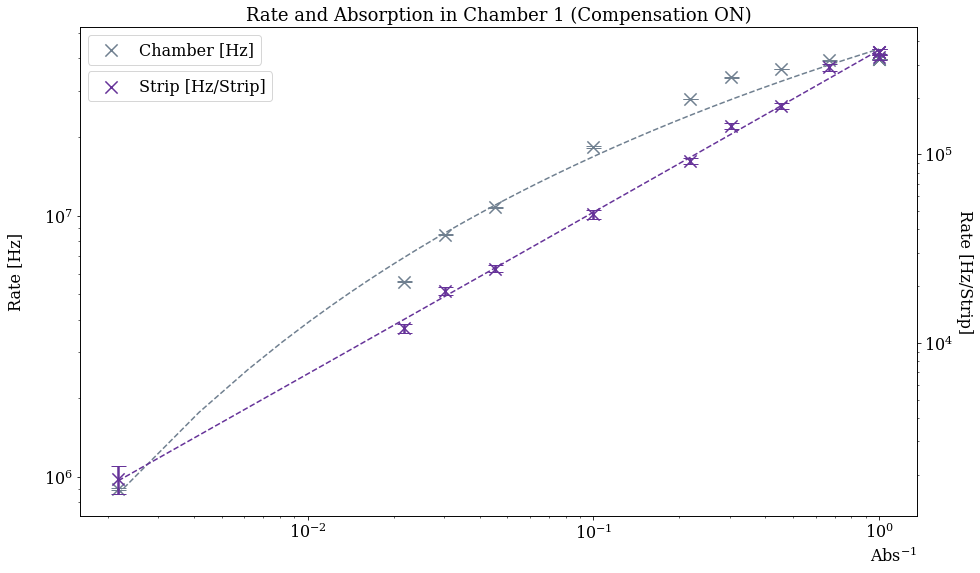

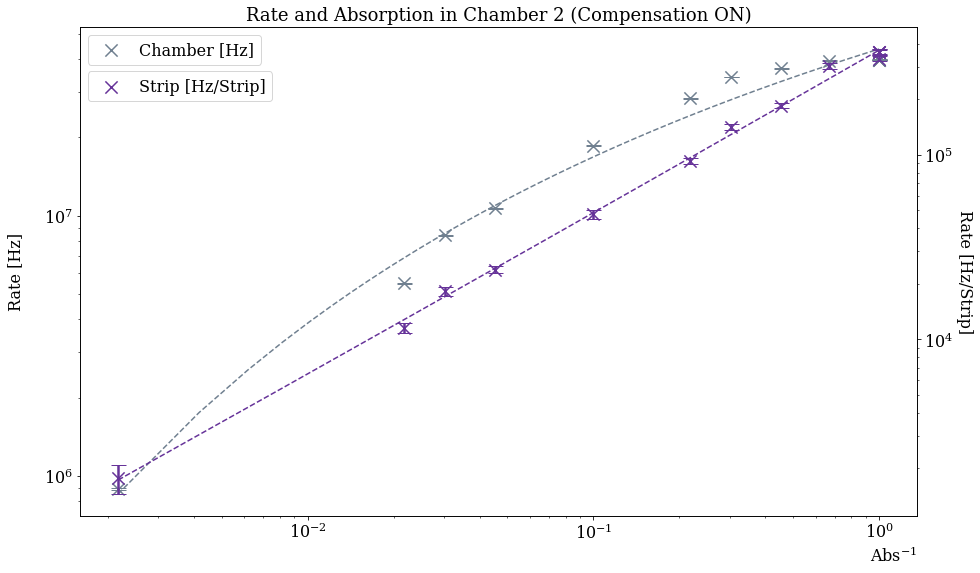

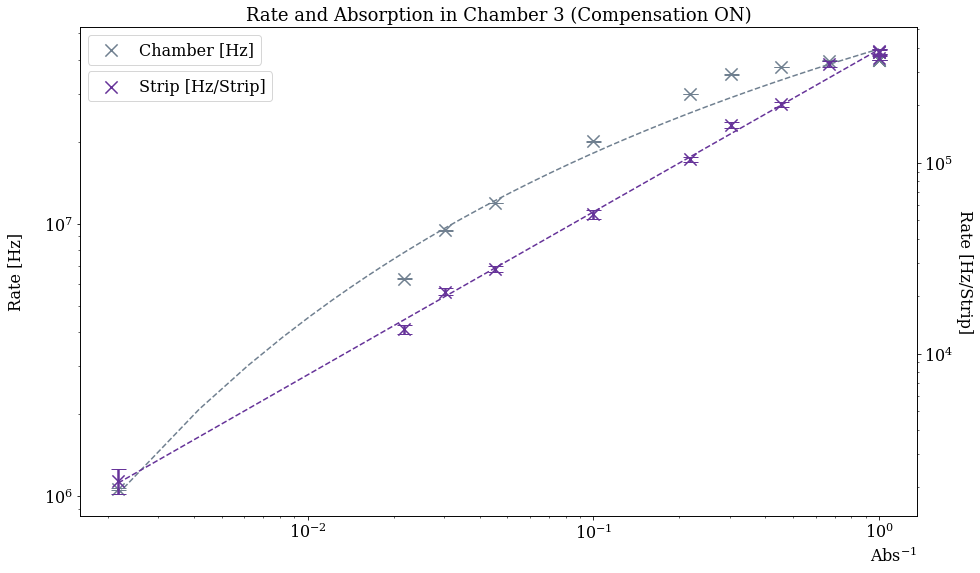

In [9]:
# Compensation ON
run_abs = {247:33, 278:1, 286:1, 287:1, 288:1, 291:1, 293:22, 294:460, 297:1.5, 299:2.2, 301:3.3, 303:4.6, 305:10, 307:33, 309:46, 311:100}
run_abs = {247:33, 278:1, 286:1, 287:1, 288:1, 291:1, 293:22, 294:460, 297:1.5, 299:2.2, 301:3.3, 303:4.6, 305:10, 307:33, 309:46}
run_abs = {286:1, 287:1, 288:1, 291:1, 293:22, 294:460, 297:1.5, 299:2.2, 301:3.3, 303:4.6, 305:10, 307:33, 309:46}

chambers = []
chamber_rate = []
eta_rate = []

data_chamber = {}
data_eta = {}
data_strip = {}

unique_chambers = [0,1,2,3]

font_title = {'family':'serif','color':'black','size':18}
font_axes = {'family':'serif','color':'black','size':16}
font_ticks = {'family':'serif','color':'black','size':16}

##########################################################

def linear_fit(x, m, b):
    return b * ( x ** m )

##########################################################    

for run in run_abs.keys():
    
    temp = pd.read_csv("Rate_per_Chamber_Run-"+str(run)+".csv")
    data_chamber[run]=temp
    
    for ch in unique_chambers:
              
        #temp = pd.read_csv("Rate_per_Eta_Run-"+str(run)+".csv")
        #data_eta[run]= temp
        
        temp = pd.read_csv("Average_Rate_per_Strip_Run-"+str(run)+".csv")
        data_strip[run]= temp
        
##########################################################    

# organizing by chambers 
for ch in unique_chambers:
    d_ch = {}
    d_ch_err = {}
    d_st = {}
    d_st_err = {}
    
    for run in run_abs.keys():
        
        temp1 = data_chamber[run]
        cut = temp1["Chamber"] == ch
        temp1 = temp1[cut]
        d_ch[temp1["Rate"][ch]] = run_abs[run]
        d_ch_err[temp1["Error"][ch]] = run_abs[run]
        
        temp2 = data_strip[run]
        cut = temp2["Chamber"] == ch
        temp2 = temp2[cut]
        d_st[np.average(temp2["Average Strip Rate"])]= run_abs[run]
        d_st_err[np.average(temp2["Uncertainty in the Mean"])] = run_abs[run]

    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(15, 9)
    
    x1 = np.divide(1,list(d_ch.values()))
    y1 = list( d_ch.keys() )
    plt.scatter( x1, y1, marker = 'x', color = 'slategrey', s = 150, label = 'Chamber [Hz]' )
    plt.errorbar( x1, y1, yerr=d_ch_err.keys(), linestyle='',elinewidth=2.5,capsize=7.5,ecolor='slategrey')
    
    x_fitting = np.log10(x1)
    y_fitting = np.log10(y1)
    guess = [(max(y_fitting)-min(y_fitting)) / (max(x_fitting)-min(x_fitting)), 0, 0]
    i = 0
    while i < 3:
        param, cov = curve_fit(saturation_fit, x_fitting, y_fitting, p0 = guess)
        guess = param
        i += 1
    x_sort = np.linspace(min(x1),max(x1),500)
    x_sort_10 = np.log10(x_sort)
    y_fitting = np.power(10, saturation_fit(x_sort_10,param[0],param[1],param[2]))
    plt.plot(x_sort, y_fitting, color = 'slategrey', linestyle = '--')
    #plt.plot(x_sort, np.power(10, lin_fit(x_sort_10, param[0], param[1])), color = 'slategrey', linestyle = '--')
    
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel('$\mathregular{Abs^{-1}}$', loc = 'right',fontdict = font_axes)
    plt.xticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    plt.ylabel('Rate [Hz]', loc = 'center', fontdict = font_axes, labelpad = 20)
    
    plt.legend(loc = 'upper left', bbox_to_anchor=(0, 1), prop = {'family':'serif','size':16})
    
    ax3 = ax1.twinx()
    x2 = np.divide(1,list(d_st.values()))
    y2 = list( d_st.keys() )
    plt.scatter(x2, y2, marker = 'x', color = 'rebeccapurple',s = 150, label = 'Strip [Hz/Strip]')
    plt.errorbar(x2, y2,yerr=d_st_err.keys(),linestyle='',elinewidth=2.5,capsize=7.5,ecolor='rebeccapurple')
 
    x_fitting = np.log10(x2)
    y_fitting = np.log10(y2)
    guess = [(max(y_fitting)-min(y_fitting)) / (max(x_fitting)-min(x_fitting)), 0, 0]
    i = 0
    while i < 3:
        param, cov = curve_fit(saturation_fit, x_fitting, y_fitting, p0 = guess)
        guess = param
        i += 1
    x_sort = np.linspace(min(x2),max(x2),500)
    x_sort_10 = np.log10(x_sort)
    y_fitting = np.power(10, saturation_fit(x_sort_10,param[0],param[1],param[2]))
    plt.plot(x_sort, y_fitting, color = 'rebeccapurple', linestyle = '--')
    #plt.plot(x_sort, np.power(10, lin_fit(x_sort_10, param[0], param[1])), color = 'rebeccapurple', linestyle = '--')

    plt.xscale("log")
    plt.yscale("log")
    ax1.set_title("Rate and Absorption in Chamber "+str(ch)+" (Compensation ON)", fontdict = font_title)
    plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    plt.ylabel('Rate [Hz/Strip]', fontdict = font_axes, rotation = 270, loc = 'center', labelpad = 20)
    
    plt.legend(loc = 'upper left', bbox_to_anchor=(0, 0.925), prop = {'family':'serif','size':16})

    plt.savefig("Rate_vs_Attenuation_Chamber_"+str(ch)+"_COMP-ON.png")
    
    plt.show()    
    
    plt.close()

Error Fitting
ERROR


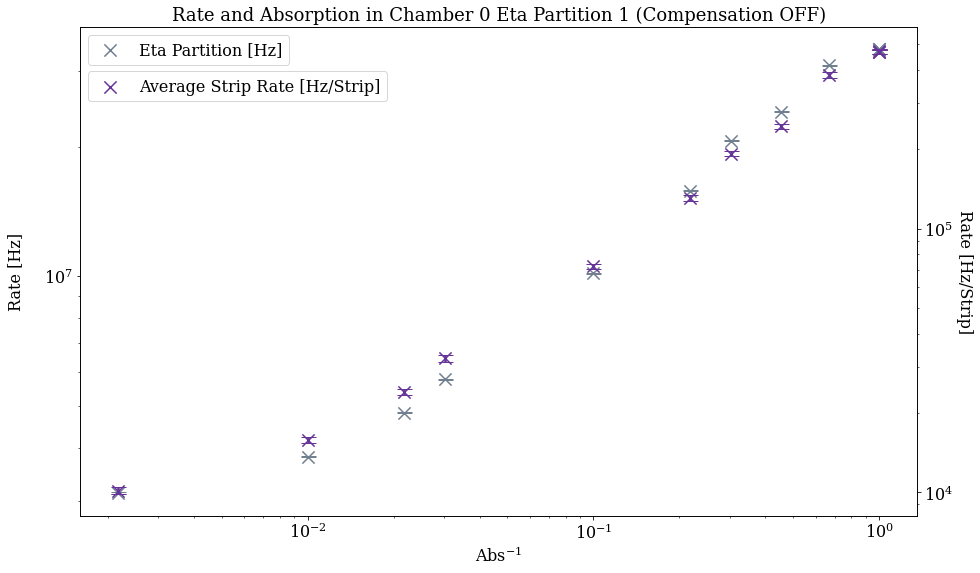

[33634670.149669185, 33626513.397089005, 33614204.52434902, 3140992.9332518443, 30852499.88081212, 24111505.51114091, 20631259.518113516, 15781504.9215143, 10155467.816032767, 5761004.691342341, 4822751.607710021, 3812507.8565759775]


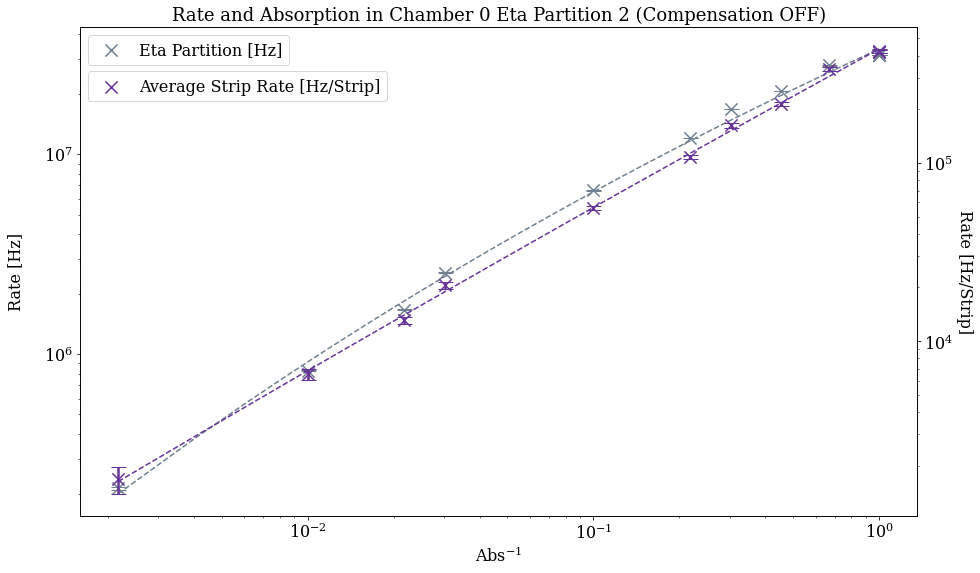

[31348450.13525184, 31379580.47424204, 31392593.142899595, 213292.06546788005, 27880022.066786084, 20757523.575988848, 16872814.164355207, 12048661.57304421, 6609448.869305997, 2556953.984918741, 1665497.3347966962, 827628.1302005842]


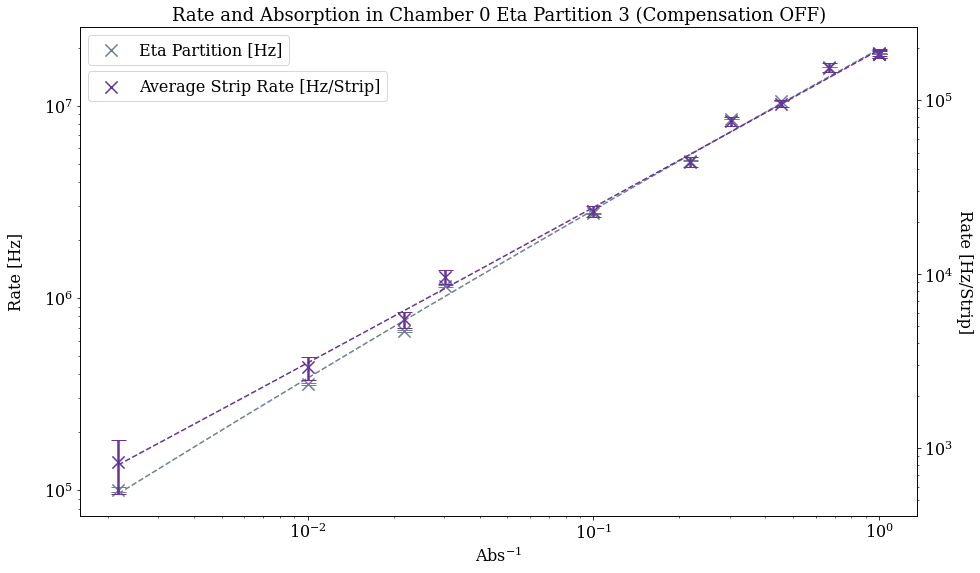

[18662826.79913496, 18532568.356780317, 18534898.4064485, 100478.28110369112, 15964658.1156249, 10630310.433130829, 8513982.336625, 5175280.107851199, 2758812.64952174, 1153943.1775904468, 672952.9171676356, 356102.2377404581]


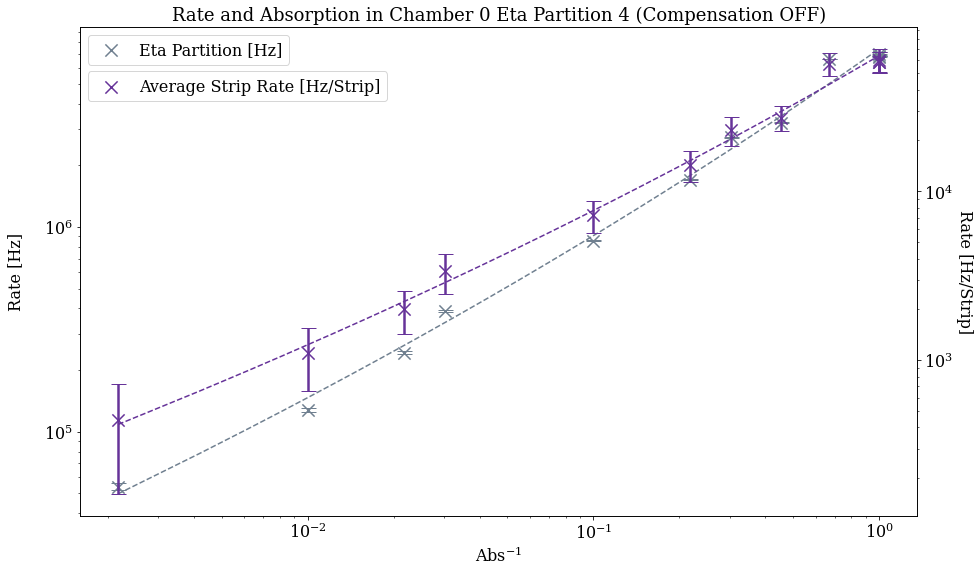

[6977638.838333013, 6834872.371535879, 6782214.627985587, 53977.171842905496, 6597365.801735571, 3234712.917085685, 2740487.4956879267, 1702950.571608435, 856624.7437515745, 389463.081767284, 242910.5009883523, 127356.26921929556]


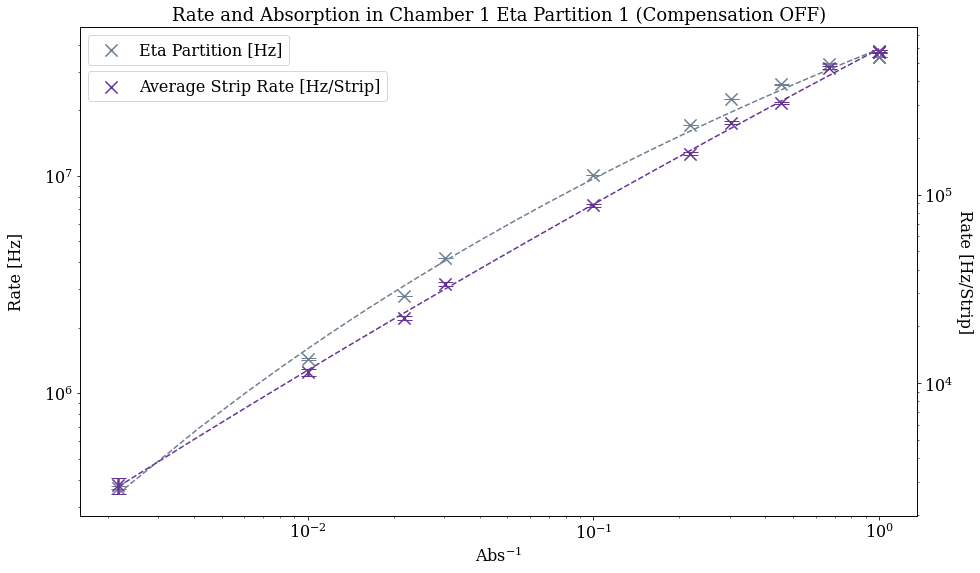

[35321071.451512754, 35280000.95993473, 35285984.91883659, 367224.1940337283, 32841526.81143698, 26320186.49560012, 22592068.02839378, 17109488.539349474, 10115052.5857258, 4184423.291561936, 2796847.75299053, 1433114.506194265]


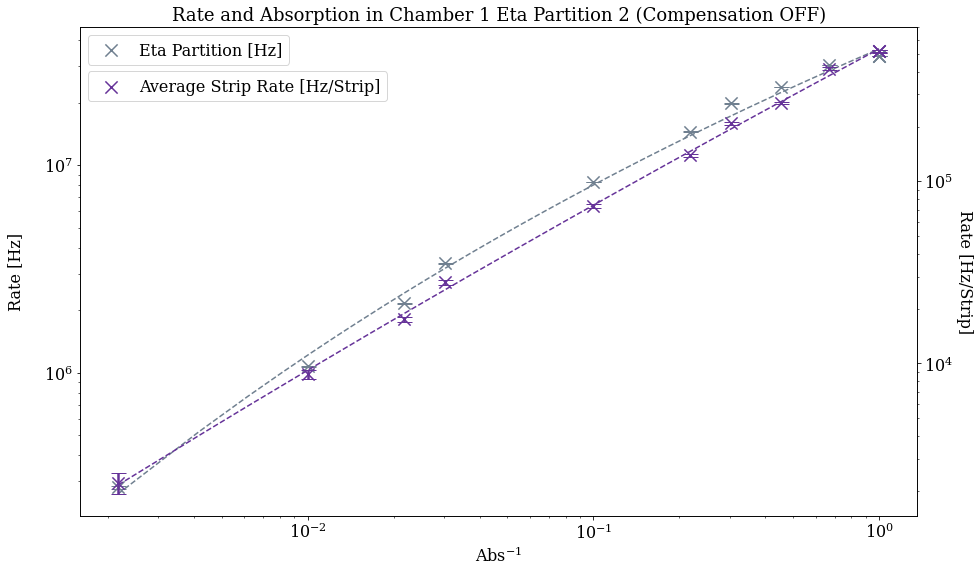

[33695051.70974027, 33577693.859674685, 33644812.59982913, 280053.3043262105, 30564775.454884224, 23794597.68900971, 19880355.735548597, 14542267.767185131, 8328877.544913931, 3368837.5089607364, 2160867.0717115817, 1073485.0176268732]


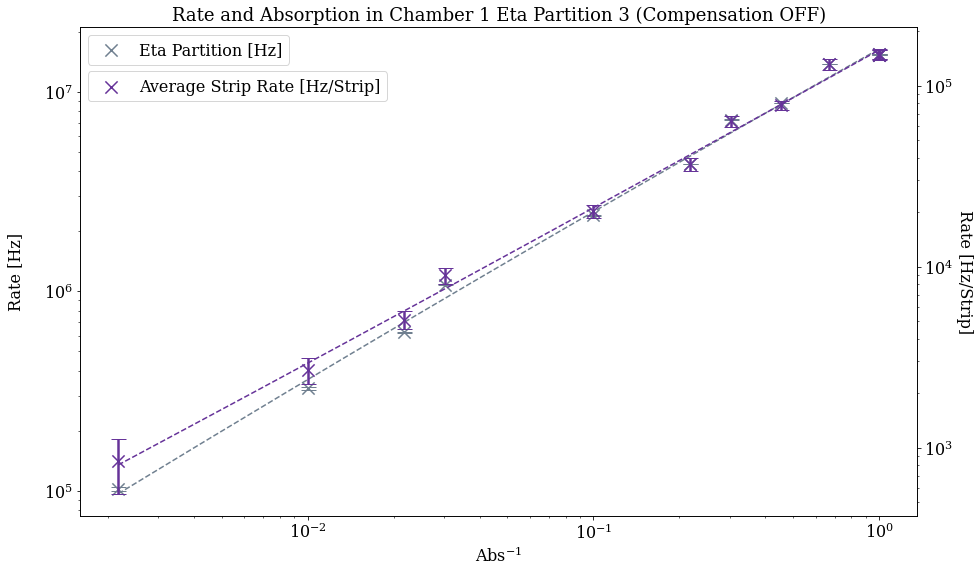

[15579513.0933773, 15390907.703990417, 15404776.939935366, 101898.7329942939, 13889134.8321494, 8799151.402160985, 7263915.72735916, 4355061.805572799, 2407266.9478846723, 1080623.9394571837, 621948.6988393046, 325407.6507571394]


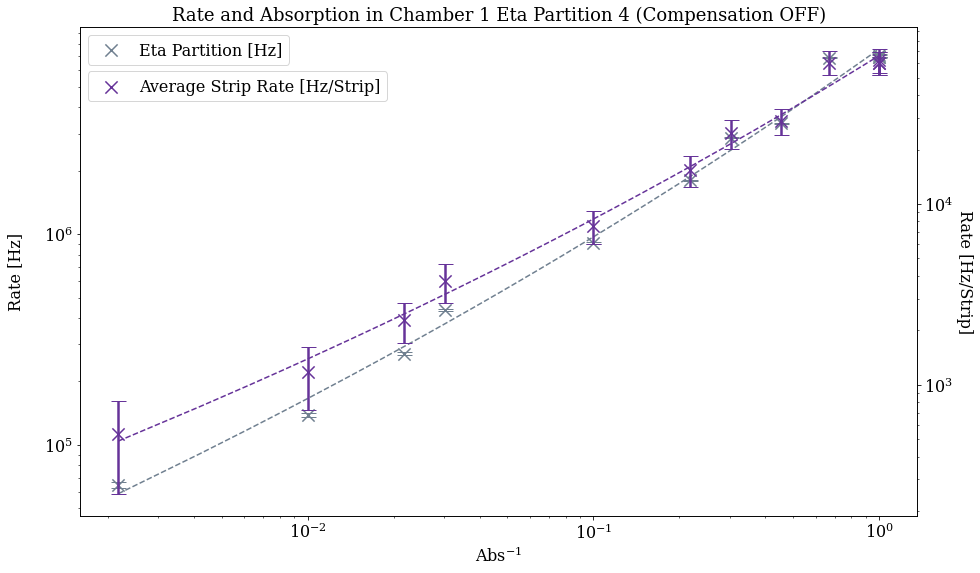

[7115745.598070074, 6936145.484964166, 6906207.050258162, 64443.65945787332, 6885284.820133315, 3351594.105734924, 2873145.1072339066, 1798415.8259657896, 906614.9322028946, 437592.44303694094, 271323.80982879235, 138988.69215918408]


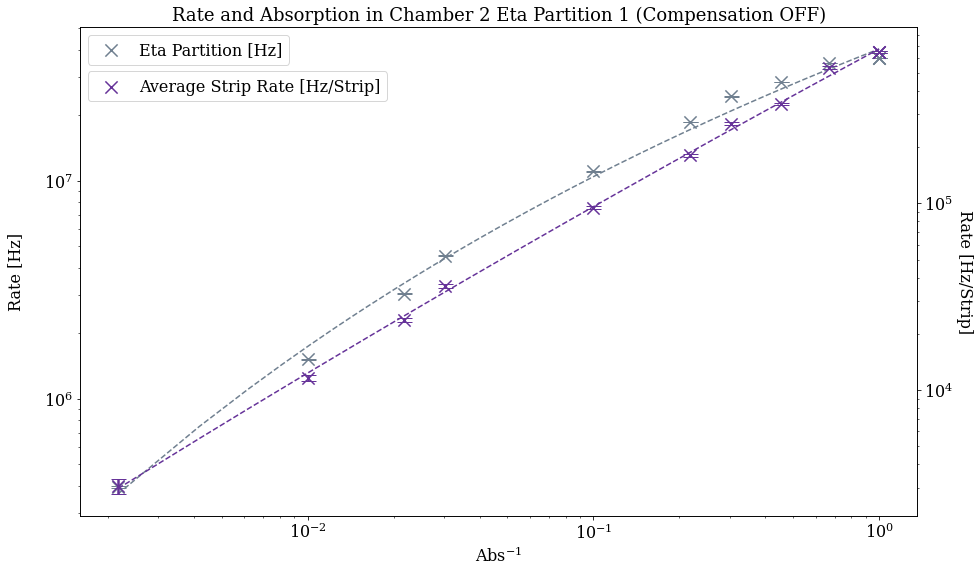

[36671948.26884782, 36659907.126315415, 36692247.68767876, 394885.6255875718, 34571337.112967744, 28302329.817407586, 24374055.20015033, 18606084.595419243, 11035361.934809567, 4538243.060533742, 3034750.990535689, 1518669.1007198968]


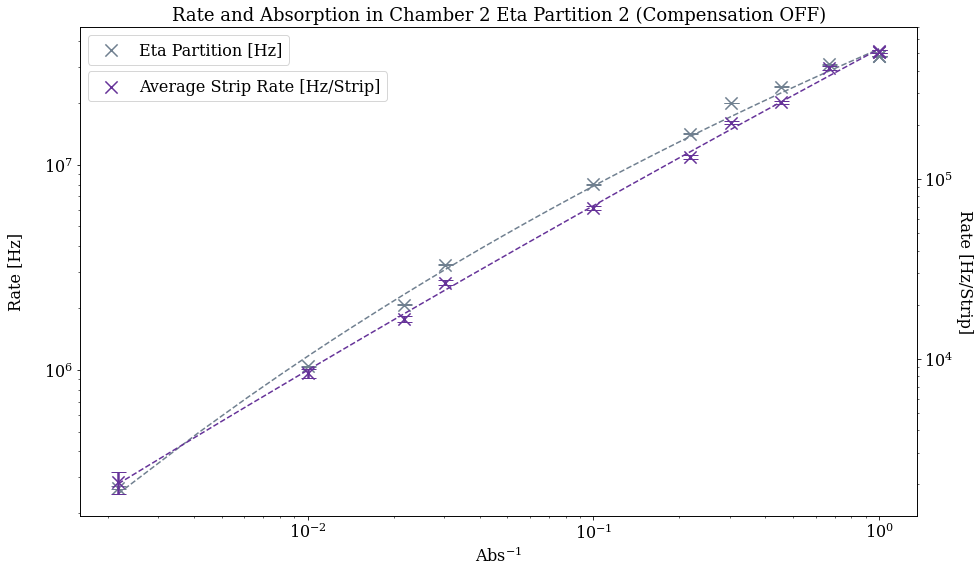

[33762499.19705372, 33732586.18413948, 33778611.492886595, 266222.58854928875, 30810740.33678119, 24026094.68968167, 19993325.0504127, 14170280.451093774, 8014462.640266875, 3259439.398201501, 2071609.6896370023, 1038737.8445870772]


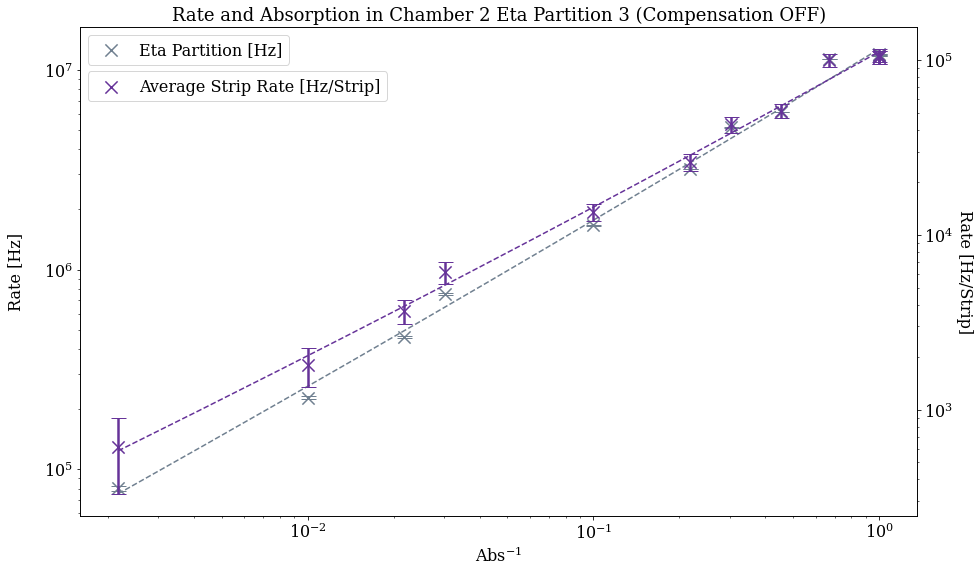

[12037270.981878394, 11821801.831761155, 11820214.702277033, 80068.63025450386, 11362993.76623023, 6150375.088204276, 5153117.173411264, 3191542.5029248646, 1669995.170769657, 755115.5594675281, 458106.3810585704, 228220.6332916192]


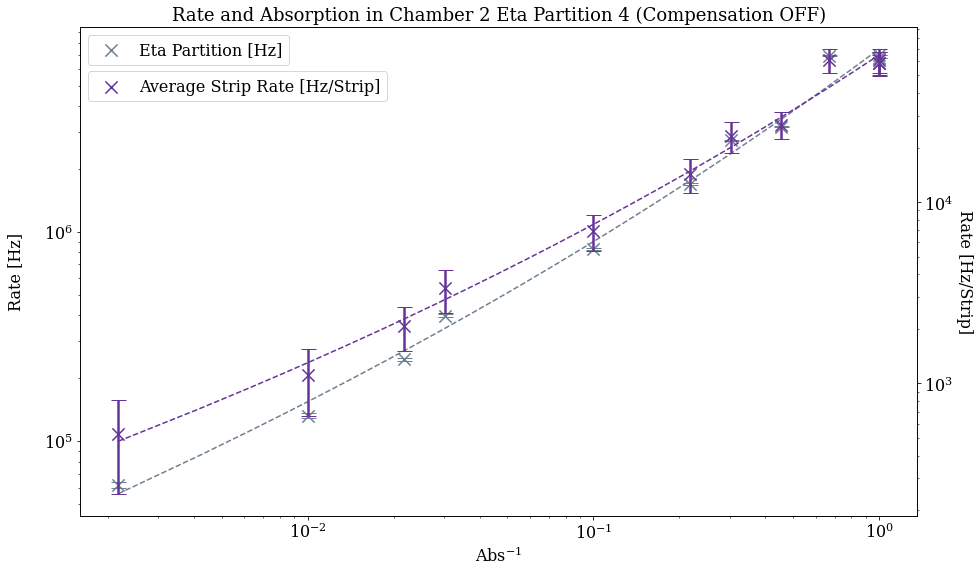

[6988059.296690434, 6779470.424582558, 6775082.649232941, 61752.276928310166, 6950395.460546863, 3175017.1816571844, 2738804.735287766, 1694186.9313675514, 828178.2111250438, 398319.4649873416, 246986.18053513672, 132759.7172945986]


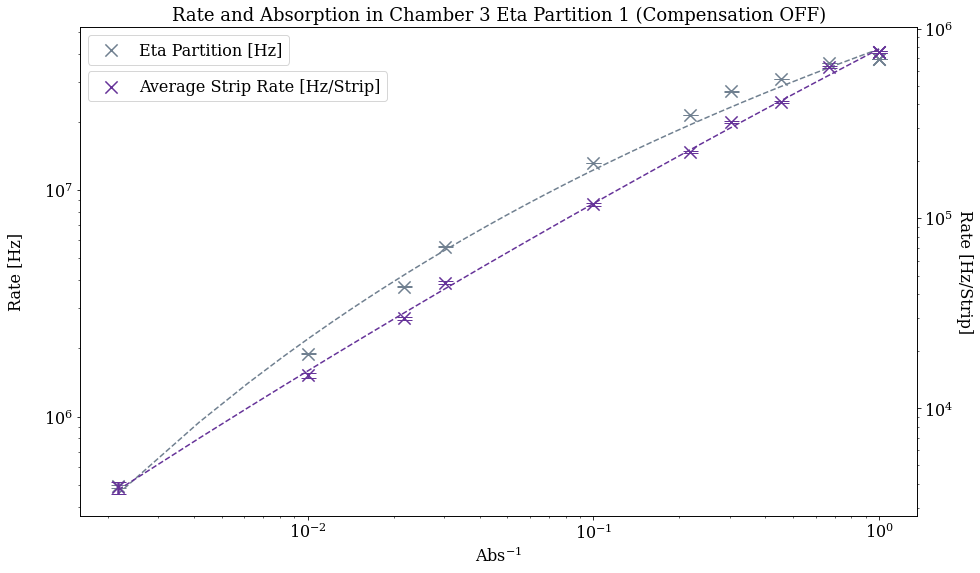

[37962443.52611181, 37963772.74916735, 37981427.13866498, 491476.3541485606, 36385094.60599403, 30970208.76670141, 27259147.90622537, 21482545.01955022, 13174864.06482024, 5623948.531346696, 3742754.751805672, 1896460.178651502]


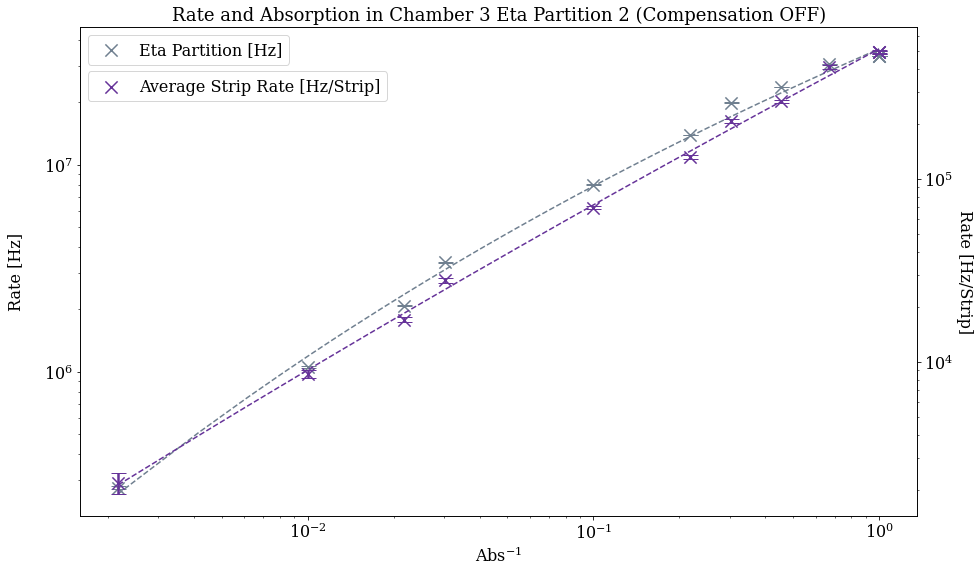

[33331477.635269683, 33310763.43951469, 33351435.682181194, 276165.75178350817, 30636113.05433314, 23661675.18478892, 19916422.90012537, 13943827.987269351, 7997817.80023687, 3380089.471248514, 2080634.4086334535, 1052321.5126652694]


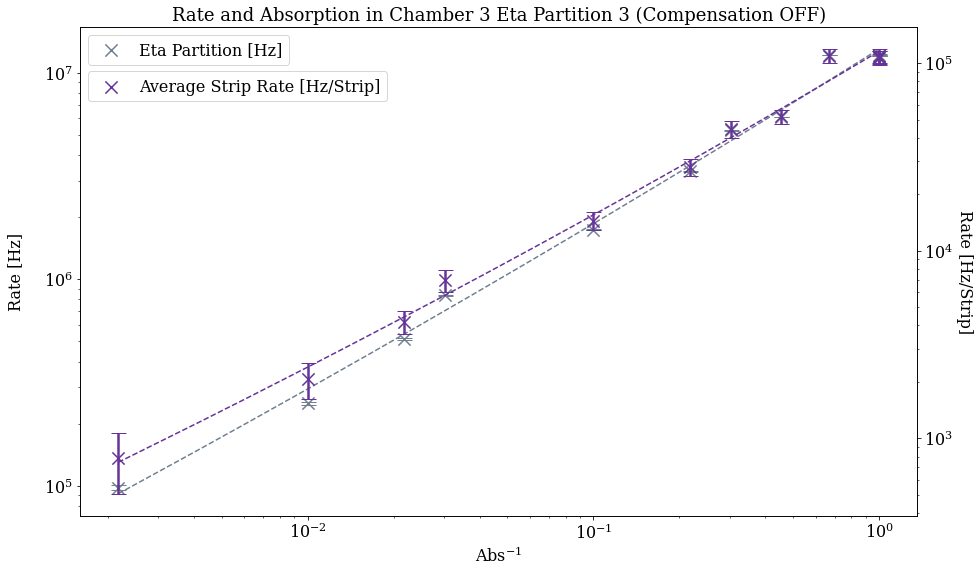

[12230120.834493143, 12017902.782610783, 12071914.119089186, 98011.18045159156, 12178705.940616217, 6093495.766960095, 5253914.521380873, 3332228.1409251774, 1731564.3783722853, 835984.501329365, 513360.9509142622, 250960.1439418529]


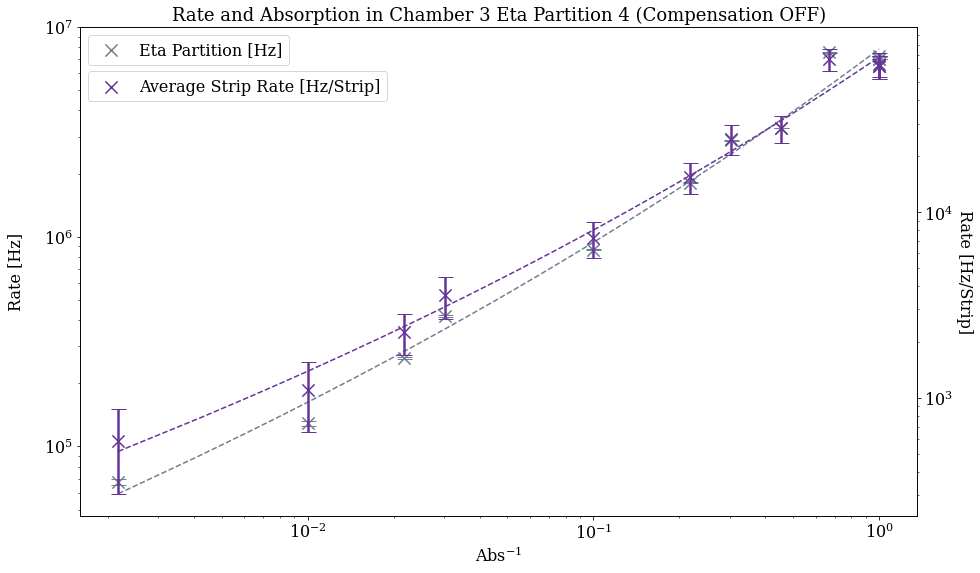

[7234581.6471461505, 7046949.3788708085, 7019130.047175068, 67733.12699400607, 7557815.855199852, 3293061.6718173376, 2873986.4874339867, 1808406.3758403964, 866756.385508969, 419879.6765968259, 263638.2426834274, 128632.08334818656]


In [17]:
# Compensation OFF
run_abs = {285:1, 289:1, 290:1, 292:1, 295:460, 296:1.5, 298:2.2, 300:3.3, 302:4.6, 304:10, 306:33, 308:46, 310:100}
run_abs = {285:1, 289:1, 290:1, 295:460, 296:1.5, 298:2.2, 300:3.3, 302:4.6, 304:10, 306:33, 308:46, 310:100}

chambers = []
chamber_rate = []
eta_rate = []

data_eta = {}
data_strip = {}

unique_chambers = [0,1,2,3]
unique_etas = [1,2,3,4]

font_title = {'family':'serif','color':'black','size':18}
font_axes = {'family':'serif','color':'black','size':16}
font_ticks = {'family':'serif','color':'black','size':16}

##########################################################

for run in run_abs.keys():
              
    temp = pd.read_csv("Rate_per_Eta_Run-"+str(run)+".csv")
    data_eta[run]= temp
        
    temp = pd.read_csv("Average_Rate_per_Strip_Run-"+str(run)+".csv")
    data_strip[run]= temp
        
##########################################################    

# organizing by chambers 
ind = 0
for ch in unique_chambers:
    
    for et in unique_etas: 
        
        d_et = {}
        d_et_err = {}
        d_st = {}
        d_st_err = {}
        
        for run in run_abs.keys():

            temp1 = data_eta[run]
            cut1 = temp1["Chamber"] == ch
            cut2 = temp1["Eta"] == et
            cut_sum = np.logical_and(cut1,cut2)
            temp1 = temp1[cut_sum]
            d_et[temp1["Rate"][ind]] = run_abs[run]
            d_et_err[temp1["Error"][ind]] = run_abs[run]

            temp2 = data_strip[run]
            cut1 = temp2["Chamber"] == ch
            cut2 = temp2["Eta"] == et  
            cut_sum = np.logical_and(cut1,cut2)
            temp2 = temp2[cut_sum]
            d_st[np.average(temp2["Average Strip Rate"])] = run_abs[run]
            d_st_err[np.average(temp2["Uncertainty in the Mean"])] = run_abs[run]
        ind+=1
        
        fig, ax1 = plt.subplots(1,1)
        fig.set_size_inches(15, 9)

        x1 = np.divide(1,list(d_et.values()))
        y1 = list( d_et.keys() )
        plt.scatter( x1, y1, marker = 'x', color = 'slategrey', s = 150, label = 'Eta Partition [Hz]' )
        plt.errorbar( x1, y1, yerr=d_et_err.keys(), linestyle='',elinewidth=2.5,capsize=7.5,ecolor='slategrey')
        
        try:
            x_fitting = np.log10(x1)
            y_fitting = np.log10(y1)
            guess = [(max(y_fitting)-min(y_fitting)) / (max(x_fitting)-min(x_fitting)), 0, 0]
            i = 0
            while i < 3:
                param, cov = curve_fit(saturation_fit, x_fitting, y_fitting, p0 = guess)
                guess = param
                i += 1
            x_sort = np.linspace(min(x1),max(x1),500)
            x_sort_10 = np.log10(x_sort)
            y_fitting = np.power(10, saturation_fit(x_sort_10,param[0],param[1],param[2]))
            plt.plot(x_sort, y_fitting, color = 'slategrey', linestyle = '--')
            #plt.plot(x_sort, np.power(10, lin_fit(x_sort_10, param[0], param[1])), color = 'slategrey', linestyle = '--')
        
        except:
            print("Error Fitting")
        
        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel('$\mathregular{Abs^{-1}}$', loc = 'center',fontdict = font_axes)
        plt.xticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
        plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
        plt.ylabel('Rate [Hz]', loc = 'center', fontdict = font_axes, labelpad = 20)

        plt.legend(loc = 'upper left', bbox_to_anchor=(0, 1), prop = {'family':'serif','size':16})

        ax3 = ax1.twinx()
        x2 = np.divide(1,list(d_st.values()))
        y2 = list( d_st.keys() )
        plt.scatter(x2, y2, marker = 'x', color = 'rebeccapurple',s = 150, label = 'Average Strip Rate [Hz/Strip]')
        plt.errorbar(x2, y2,yerr=d_st_err.keys(),linestyle='',elinewidth=2.5,capsize=7.5,ecolor='rebeccapurple')
        
        try:
            x_fitting = np.log10(x2)
            y_fitting = np.log10(y2)
            guess = [(max(y_fitting)-min(y_fitting)) / (max(x_fitting)-min(x_fitting)), 0, 0]
            i = 0
            while i < 3:
                param, cov = curve_fit(saturation_fit, x_fitting, y_fitting, p0 = guess)
                guess = param
                i += 1
            x_sort = np.linspace(min(x2),max(x2),500)
            x_sort_10 = np.log10(x_sort)
            y_fitting = np.power(10, saturation_fit(x_sort_10,param[0],param[1],param[2]))
            plt.plot(x_sort, y_fitting, color = 'rebeccapurple', linestyle = '--')
            #plt.plot(x_sort, np.power(10, lin_fit(x_sort_10, param[0], param[1])), color = 'rebeccapurple', linestyle = '--')
        
        except:
            print("ERROR")

        plt.xscale("log")
        plt.yscale("log")
        ax1.set_title("Rate and Absorption in Chamber "+str(ch)+" Eta Partition "+str(et)+" (Compensation OFF)", fontdict = font_title)
        plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
        plt.ylabel('Rate [Hz/Strip]', fontdict = font_axes, rotation = 270, loc = 'center', labelpad = 20)

        plt.legend(loc = 'upper left', bbox_to_anchor=(0, 0.925), prop = {'family':'serif','size':16})
        
        plt.savefig("Rate_vs_Attenuation_Chamber_"+str(ch)+"_Eta_"+str(et)+"_COMP-OFF.png")

        plt.show()

        plt.close()
        
        print(y1)

Error Fitting
ERROR


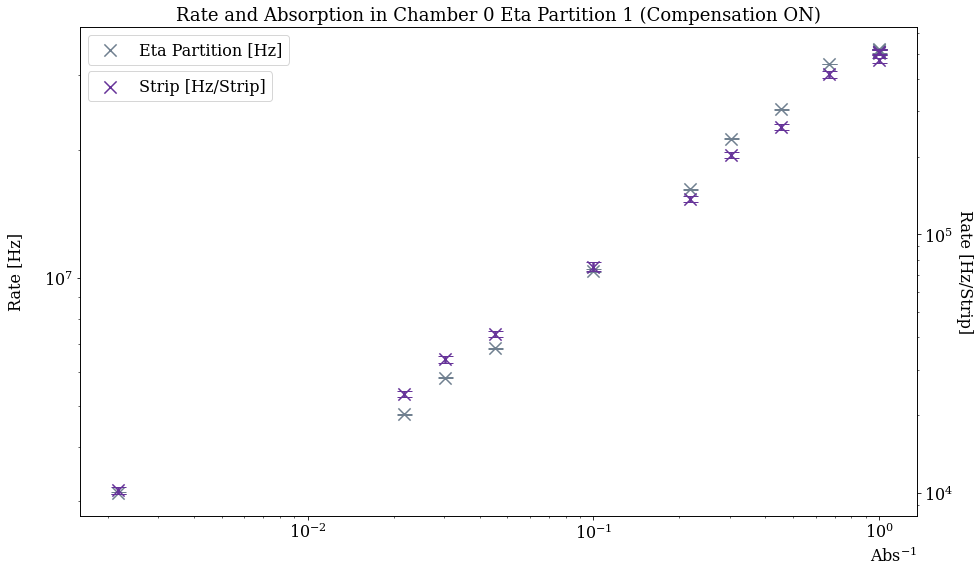

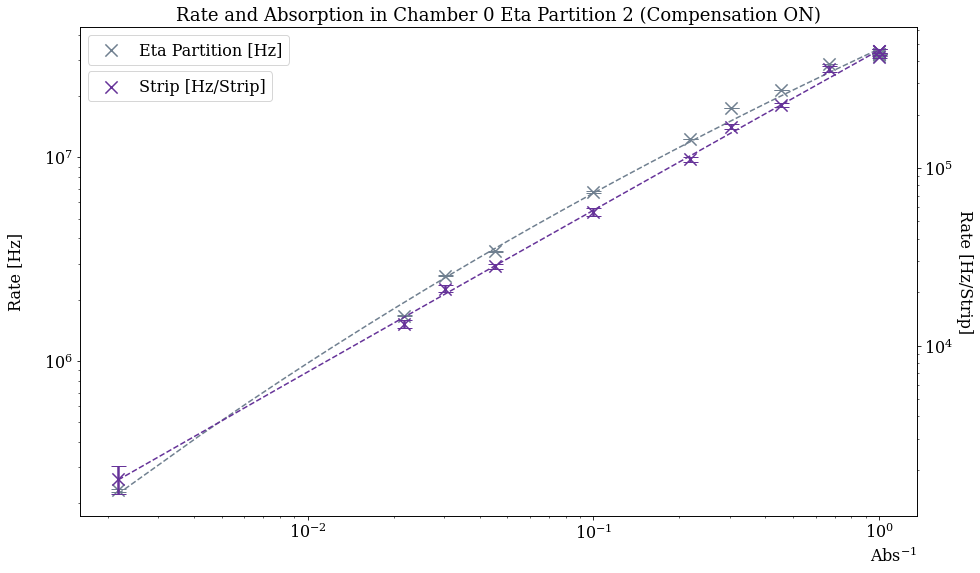

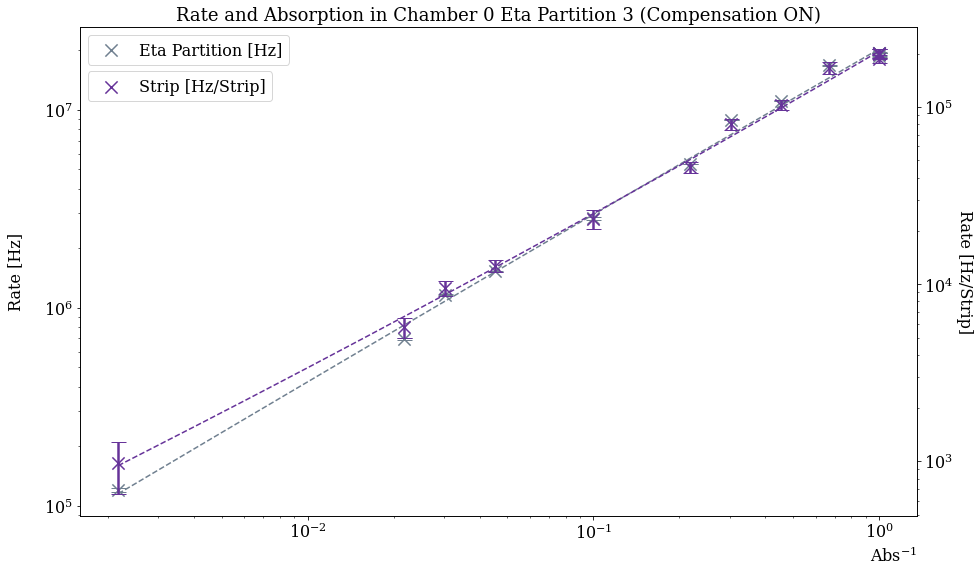

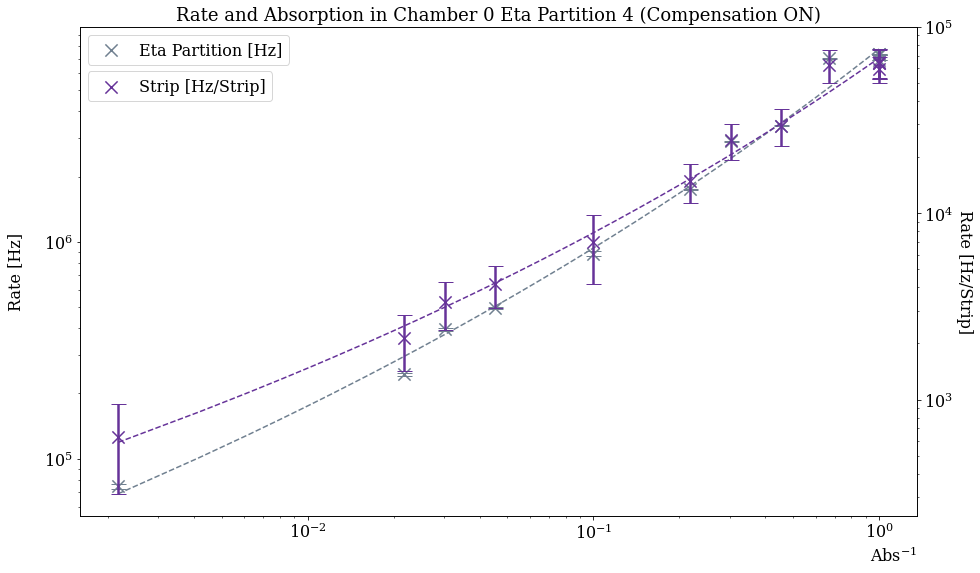

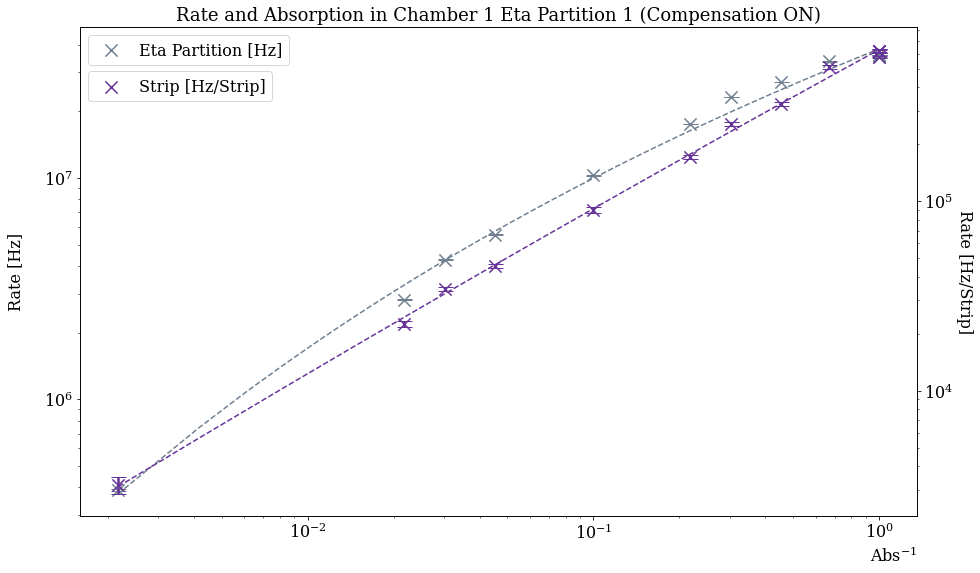

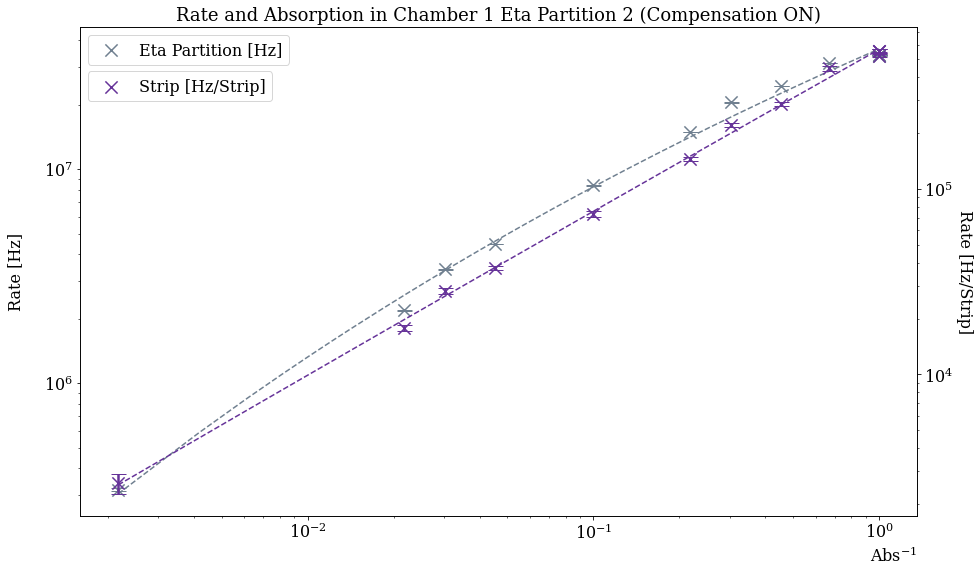

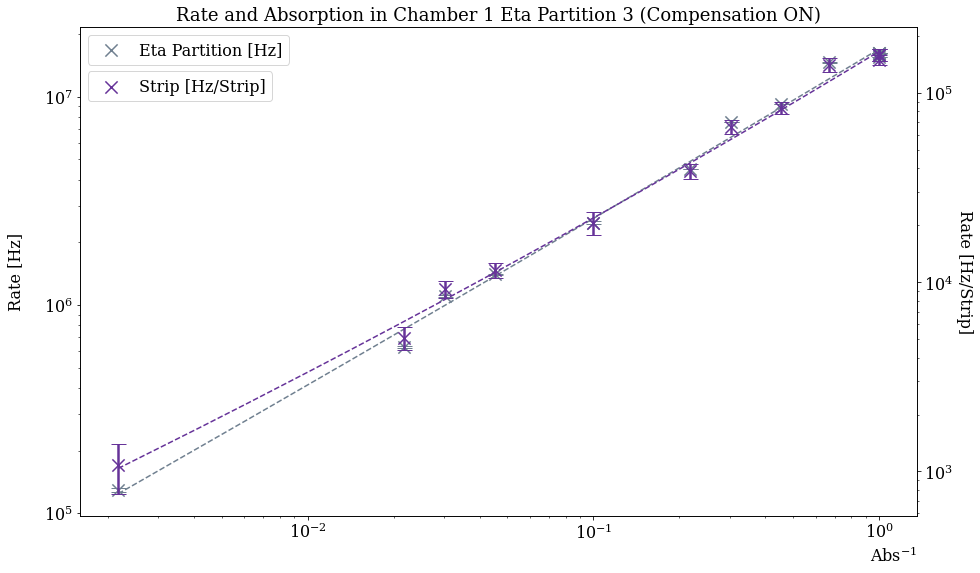

Error Fitting


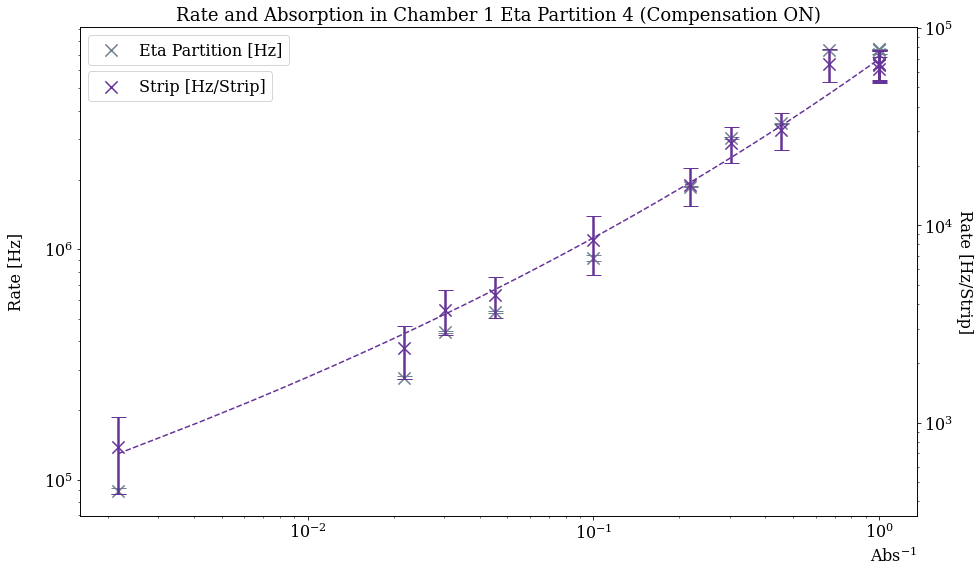

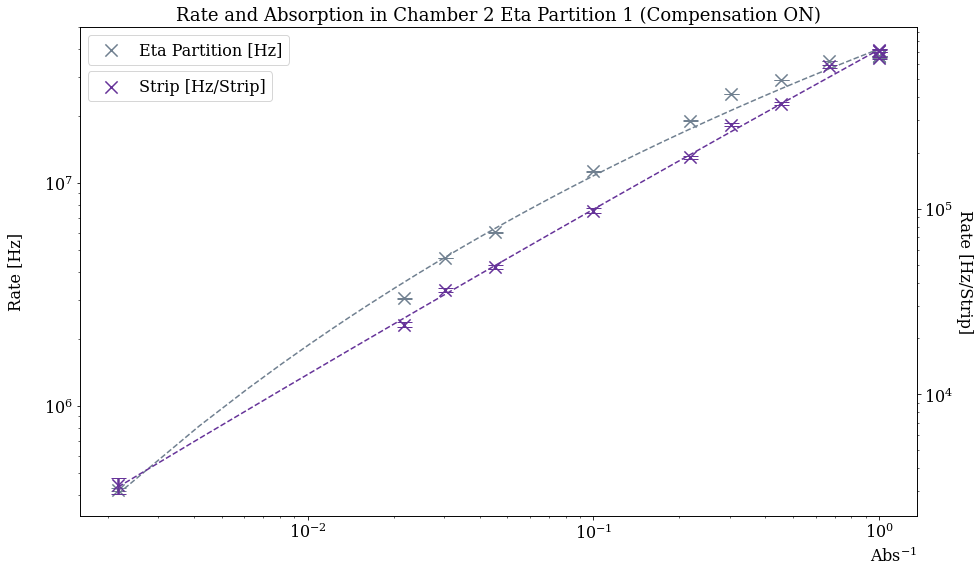

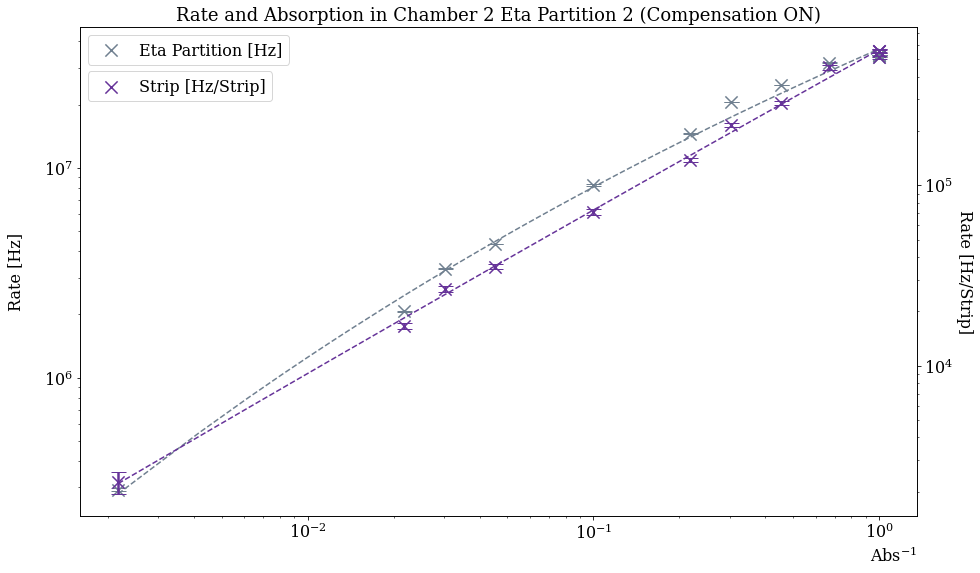

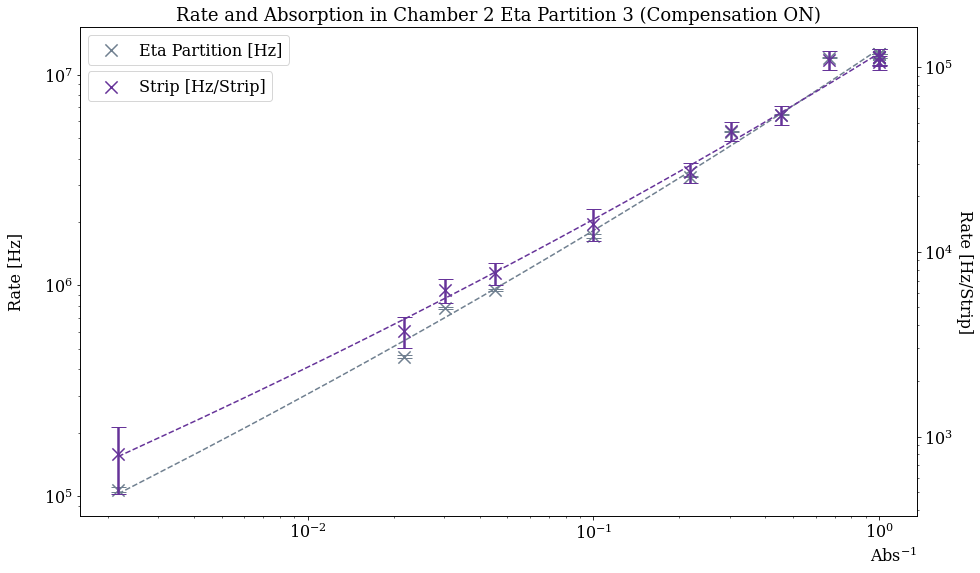

Error Fitting


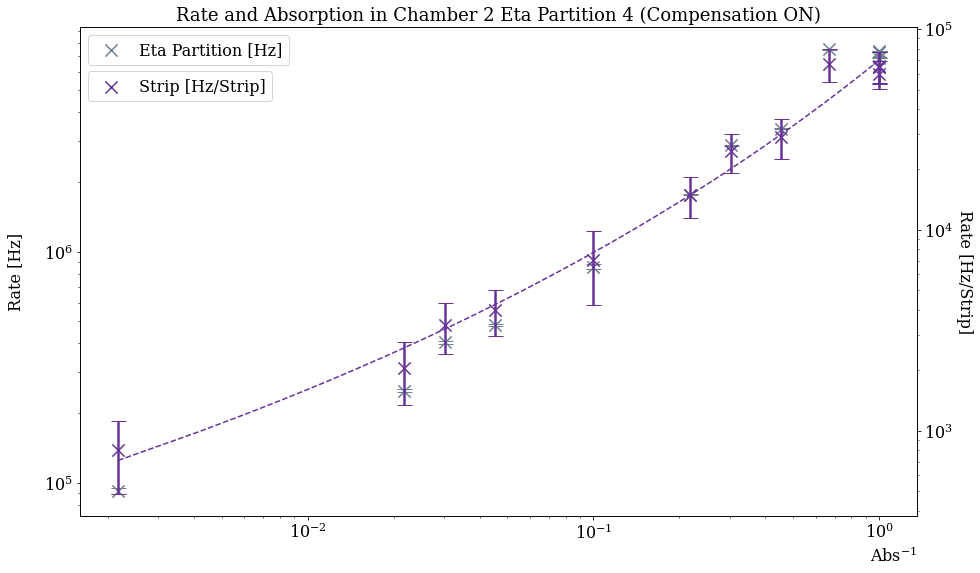

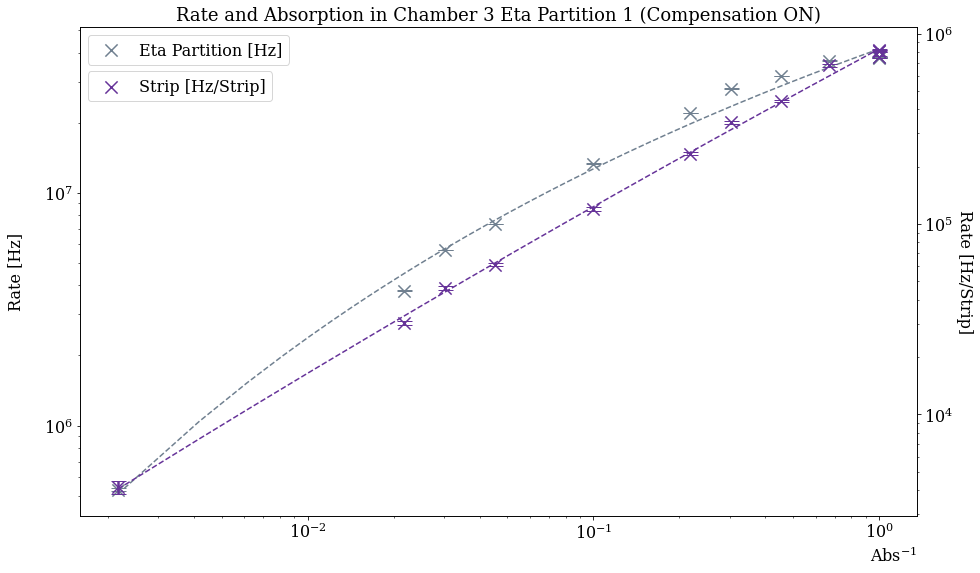

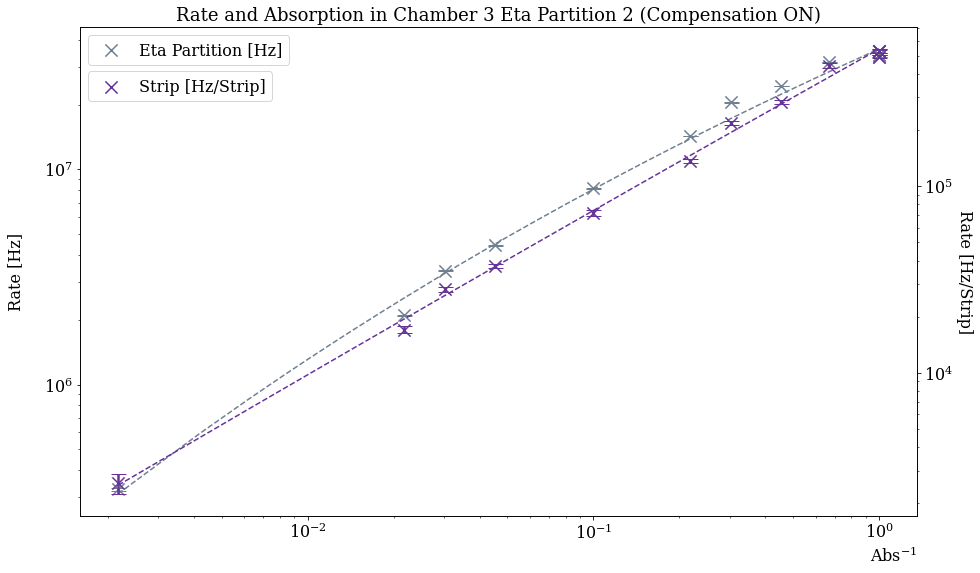

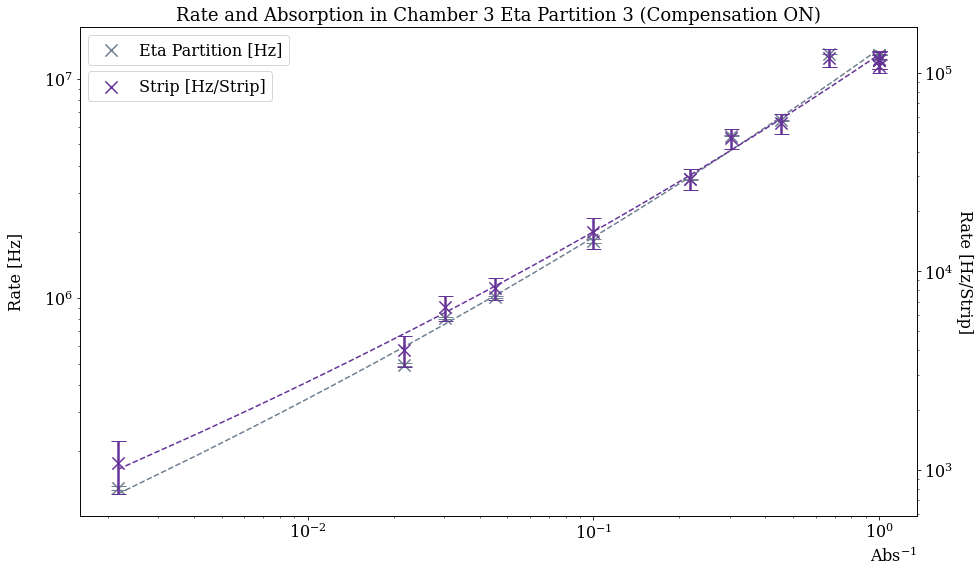

Error Fitting


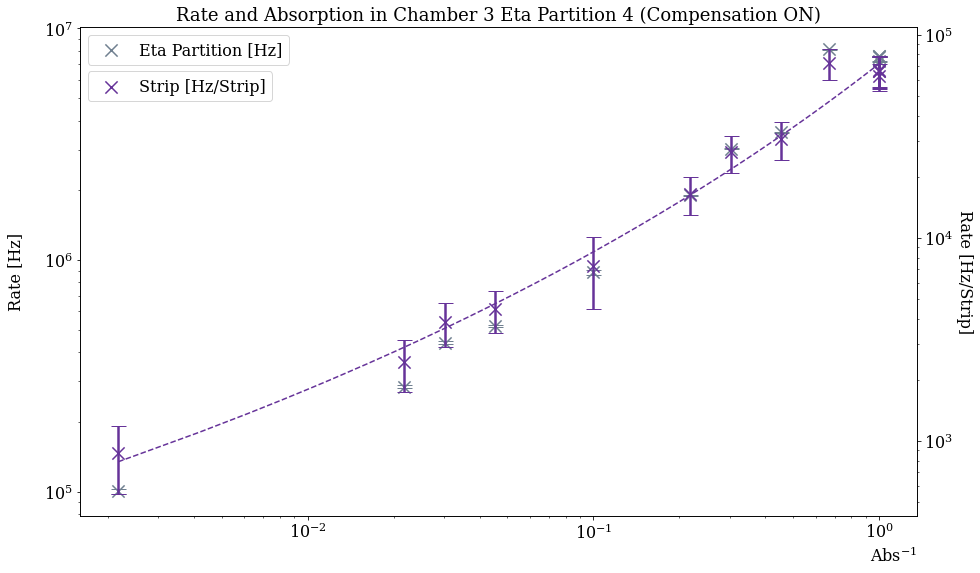

In [11]:
# Compensation ON
run_abs = {286:1, 287:1, 288:1, 291:1, 293:22, 294:460, 297:1.5, 299:2.2, 301:3.3, 303:4.6, 305:10, 307:33, 309:46}

chambers = []
chamber_rate = []
eta_rate = []

data_eta = {}
data_strip = {}

unique_chambers = [0,1,2,3]
unique_etas = [1,2,3,4]

font_title = {'family':'serif','color':'black','size':18}
font_axes = {'family':'serif','color':'black','size':16}
font_ticks = {'family':'serif','color':'black','size':16}

##########################################################

for run in run_abs.keys():
              
    temp = pd.read_csv("Rate_per_Eta_Run-"+str(run)+".csv")
    data_eta[run]= temp
        
    temp = pd.read_csv("Average_Rate_per_Strip_Run-"+str(run)+".csv")
    data_strip[run]= temp
        
##########################################################    

# organizing by chambers 
ind = 0
for ch in unique_chambers:
    
    for et in unique_etas:

        d_et = {}
        d_et_err = {}
        d_st = {}
        d_st_err = {}
        
        for run in run_abs.keys():
            
            temp1 = data_eta[run]
            cut1 = temp1["Chamber"] == ch
            cut2 = temp1["Eta"] == et
            cut_sum = np.logical_and(cut1,cut2)
            temp1 = temp1[cut_sum]
            d_et[temp1["Rate"][ind]] = run_abs[run]
            d_et_err[temp1["Error"][ind]] = run_abs[run]

            temp2 = data_strip[run]
            cut1 = temp2["Chamber"] == ch
            cut2 = temp2["Eta"] == et  
            cut_sum = np.logical_and(cut1,cut2)
            temp2 = temp2[cut_sum]
            d_st[np.average(temp2["Average Strip Rate"])] = run_abs[run]
            d_st_err[np.average(temp2["Uncertainty in the Mean"])] = run_abs[run]
            
        ind+=1
                
        fig, ax1 = plt.subplots(1,1)
        fig.set_size_inches(15, 9)

        x1 = np.divide(1,list(d_et.values()))
        y1 = list( d_et.keys() )
        plt.scatter( x1, y1, marker = 'x', color = 'slategrey', s = 150, label = 'Eta Partition [Hz]' )
        plt.errorbar( x1, y1, yerr=d_et_err.keys(), linestyle='',elinewidth=2.5,capsize=7.5,ecolor='slategrey')
        
        try:
            x_fitting = np.log10(x1)
            y_fitting = np.log10(y1)
            guess = [(max(y_fitting)-min(y_fitting)) / (max(x_fitting)-min(x_fitting)), 0, 0]
            i = 0
            while i < 3:
                param, cov = curve_fit(saturation_fit, x_fitting, y_fitting, p0 = guess)
                guess = param
                i += 1
            x_sort = np.linspace(min(x1),max(x1),500)
            x_sort_10 = np.log10(x_sort)
            y_fitting = np.power(10, saturation_fit(x_sort_10,param[0],param[1],param[2]))
            plt.plot(x_sort, y_fitting, color = 'slategrey', linestyle = '--')
            #plt.plot(x_sort, np.power(10, lin_fit(x_sort_10, param[0], param[1])), color = 'slategrey', linestyle = '--')

        except:
            print("Error Fitting")
        
        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel('$\mathregular{Abs^{-1}}$', loc = 'right',fontdict = font_axes)
        plt.xticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
        plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
        plt.ylabel('Rate [Hz]', loc = 'center', fontdict = font_axes, labelpad = 20)

        plt.legend(loc = 'upper left', bbox_to_anchor=(0, 1), prop = {'family':'serif','size':16})

        ax3 = ax1.twinx()
        x2 = np.divide(1,list(d_st.values()))
        y2 = list( d_st.keys() )
        plt.scatter(x2, y2, marker = 'x', color = 'rebeccapurple',s = 150, label = 'Strip [Hz/Strip]')
        plt.errorbar(x2, y2,yerr=d_st_err.keys(),linestyle='',elinewidth=2.5,capsize=7.5,ecolor='rebeccapurple')
        
        try:
            x_fitting = np.log10(x2)
            y_fitting = np.log10(y2)
            guess = [(max(y_fitting)-min(y_fitting)) / (max(x_fitting)-min(x_fitting)), 0, 0]
            i = 0
            while i < 3:
                param, cov = curve_fit(saturation_fit, x_fitting, y_fitting, p0 = guess)
                guess = param
                i += 1
            x_sort = np.linspace(min(x2),max(x2),500)
            x_sort_10 = np.log10(x_sort)
            y_fitting = np.power(10, saturation_fit(x_sort_10,param[0],param[1],param[2]))
            plt.plot(x_sort, y_fitting, color = 'rebeccapurple', linestyle = '--')
        
        except:
            print("ERROR")

        plt.xscale("log")
        plt.yscale("log")
        ax1.set_title("Rate and Absorption in Chamber "+str(ch)+" Eta Partition "+str(et)+" (Compensation ON)", fontdict = font_title)
        plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
        plt.ylabel('Rate [Hz/Strip]', fontdict = font_axes, rotation = 270, loc = 'center', labelpad = 20)

        plt.legend(loc = 'upper left', bbox_to_anchor=(0, 0.925), prop = {'family':'serif','size':16})
        
        plt.savefig("Rate_vs_Attenuation_Chamber_"+str(ch)+"_Eta_"+str(et)+"_COMP-ON.png")
        
        plt.show()

        plt.close()

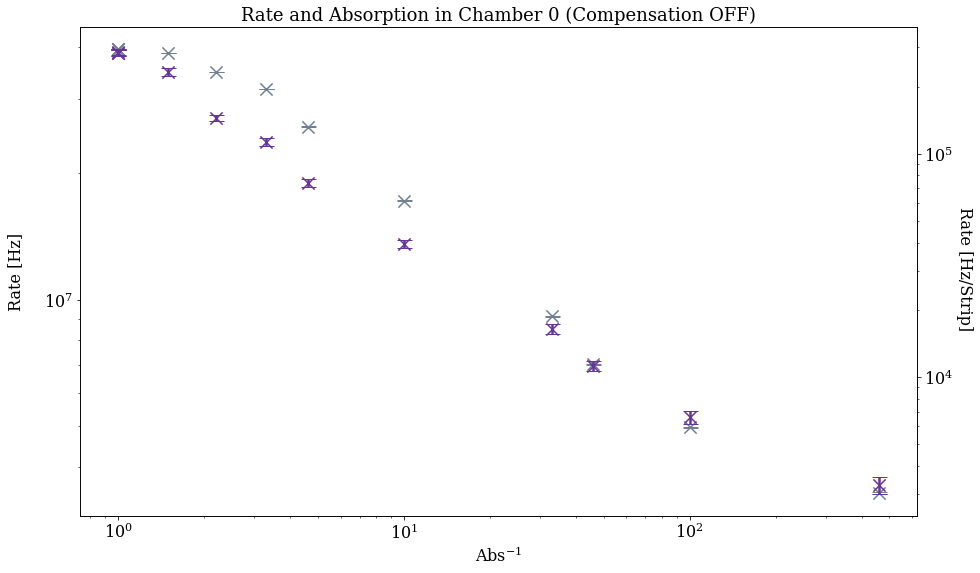

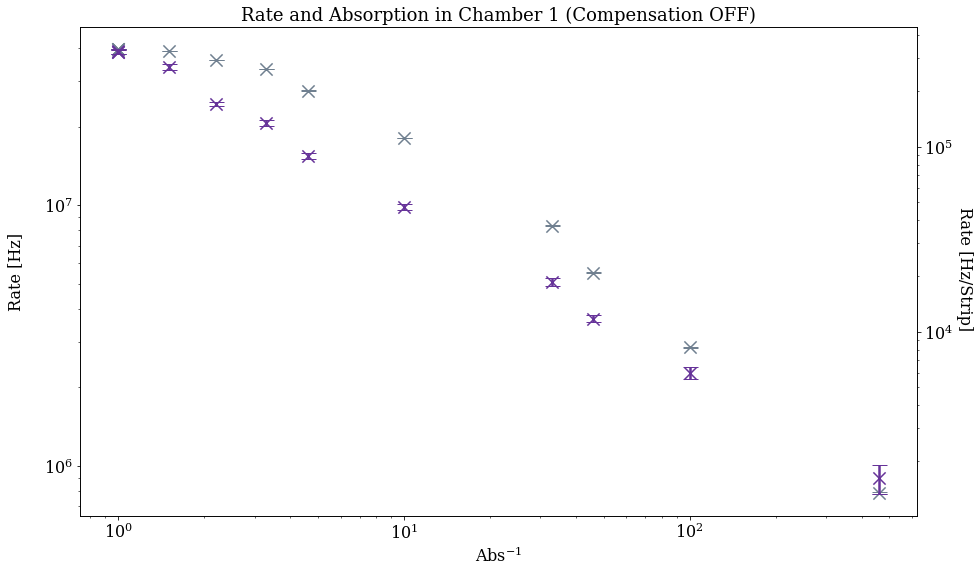

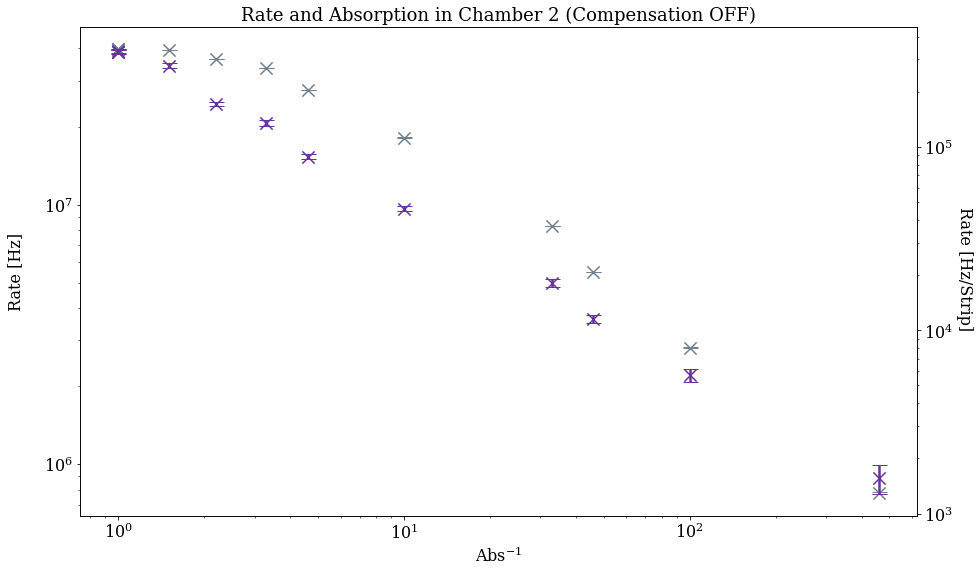

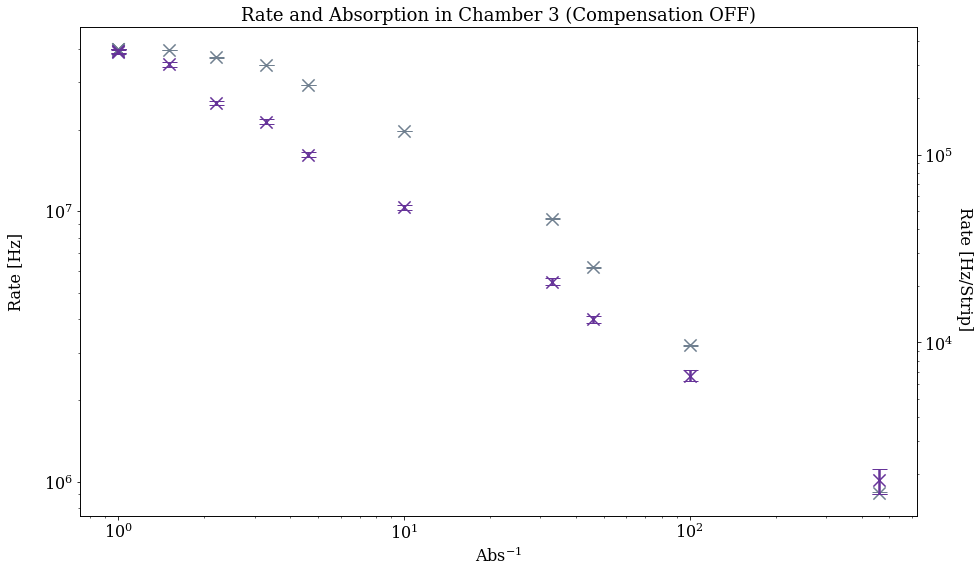

In [5]:
# Compensation OFF
#run_abs = {285:1, 289:1, 290:1, 292:1, 295:460, 296:1.5, 298:2.2, 300:3.3, 302:4.6, 304:10, 306:33, 308:46, 310:100}
run_abs = {285:1, 289:1, 290:1, 295:460, 296:1.5, 298:2.2, 300:3.3, 302:4.6, 304:10, 306:33, 308:46, 310:100}
#run_abs = {285:1, 289:1, 290:1, 296:1.5, 298:2.2, 300:3.3}

chambers = []
chamber_rate = []
eta_rate = []

data_chamber = {}
data_eta = {}
data_strip = {}

unique_chambers = [0, 1,2,3]

font_title = {'family':'serif','color':'black','size':18}
font_axes = {'family':'serif','color':'black','size':16}
font_ticks = {'family':'serif','color':'black','size':16}

##########################################################    

for run in run_abs.keys():
    
    temp = pd.read_csv("Rate_per_Chamber_Run-"+str(run)+".csv")
    data_chamber[run]=temp
    
    for ch in unique_chambers:
              
        #temp = pd.read_csv("Rate_per_Eta_Run-"+str(run)+".csv")
        #data_eta[run]= temp
        
        temp = pd.read_csv("Average_Rate_per_Strip_Run-"+str(run)+".csv")
        data_strip[run]= temp
        
##########################################################    

# organizing by chambers 
yolk = {}
for ch in unique_chambers:
    d_ch = {}
    d_ch_err = {}
    d_st = {}
    d_st_err = {}
    
    for run in run_abs.keys():
        
        temp1 = data_chamber[run]
        cut = temp1["Chamber"] == ch
        temp1 = temp1[cut]
        d_ch[temp1["Rate"][ch]] = run_abs[run]
        d_ch_err[temp1["Error"][ch]] = run_abs[run]
        
        temp2 = data_strip[run]
        cut = temp2["Chamber"] == ch
        temp2 = temp2[cut]
        d_st[np.average(temp2["Average Strip Rate"])] = run_abs[run]
        d_st_err[np.average(temp2["Uncertainty in the Mean"])] = run_abs[run]
        
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(15, 9)
    
    x1 = list(d_ch.values())
    y1 = list( d_ch.keys() )
    plt.scatter( x1, y1, marker = 'x', color = 'slategrey', s = 150, label = 'Chamber Rate [Hz]' )
    plt.errorbar( x1, y1, yerr=d_ch_err.keys(), linestyle='',elinewidth=2.5,capsize=7.5,ecolor='slategrey')
    
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel('$\mathregular{Abs^{-1}}$', loc = 'center',fontdict = font_axes)
    plt.xticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    plt.ylabel('Rate [Hz]', loc = 'center', fontdict = font_axes, labelpad = 20)
        
    ax1 = ax1.twinx()
    x2 = list(d_st.values())
    y2 = list( d_st.keys() )
    plt.scatter(x2, y2, marker = 'x', color = 'rebeccapurple',s = 150, label = 'Average Strip Rate [Hz/Strip]')
    plt.errorbar(x2, y2,yerr=d_st_err.keys(),linestyle='',elinewidth=2.5,capsize=7.5,ecolor='rebeccapurple')
    
    plt.xscale("log")
    plt.yscale("log")
    ax1.set_title("Rate and Absorption in Chamber "+str(ch)+" (Compensation OFF)", fontdict = font_title)
    plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    plt.ylabel('Rate [Hz/Strip] ', fontdict = font_axes, rotation = 270, loc = 'center', labelpad = 20)
        
    plt.show()
    
    plt.close()